#This is the submission Notebook of Team Sigmoid Freud
by Jamie, Daniel, Jacob, Fan, Jan

##Download the data, import necessary packages and load the data into DataFrames

In [20]:
# Demonstration data used in this excercise is already preprocessed and split into
# training, validation, and test sets

# Use wget to download the data stored in csv format.
import itertools

# Define what files to download; download all of the preprocessed data
# Note that the data are already split into Train, Validation, and Test sets.
# The predictor data are denoted with 'X', the target by 'y'
data_download = {}
data_download["window_size"] = [5, 15]
data_download["data_type"] = ["train", "valid", "test"]
data_download["predictor_or_target"] = ["X", "y"]

# Prepare the combinations of the window sizes and the data types
keys, values = zip(*data_download.items())
data_download_combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]
display('The kind of data to be downloaded:', data_download_combinations)

print("Downloading started...")
for data_download_param in data_download_combinations:
  file_to_download = "https://frankfurt-school-dataset.s3.eu-central-1.amazonaws.com/Sept2021/window_size_{0}_time_encoding_True/{1}_{2}_window_size_{0}_time_encoding_True.csv"\
                     .format(data_download_param["window_size"], data_download_param["predictor_or_target"], data_download_param["data_type"])

  # the actual downloading
  !wget "$file_to_download"

print("Downloading has finished")

'The kind of data to be downloaded:'

[{'data_type': 'train', 'predictor_or_target': 'X', 'window_size': 5},
 {'data_type': 'train', 'predictor_or_target': 'y', 'window_size': 5},
 {'data_type': 'valid', 'predictor_or_target': 'X', 'window_size': 5},
 {'data_type': 'valid', 'predictor_or_target': 'y', 'window_size': 5},
 {'data_type': 'test', 'predictor_or_target': 'X', 'window_size': 5},
 {'data_type': 'test', 'predictor_or_target': 'y', 'window_size': 5},
 {'data_type': 'train', 'predictor_or_target': 'X', 'window_size': 15},
 {'data_type': 'train', 'predictor_or_target': 'y', 'window_size': 15},
 {'data_type': 'valid', 'predictor_or_target': 'X', 'window_size': 15},
 {'data_type': 'valid', 'predictor_or_target': 'y', 'window_size': 15},
 {'data_type': 'test', 'predictor_or_target': 'X', 'window_size': 15},
 {'data_type': 'test', 'predictor_or_target': 'y', 'window_size': 15}]

--2021-10-28 09:55:50--  https://frankfurt-school-dataset.s3.eu-central-1.amazonaws.com/Sept2021/window_size_5_time_encoding_True/X_train_window_size_5_time_encoding_True.csv
Resolving frankfurt-school-dataset.s3.eu-central-1.amazonaws.com (frankfurt-school-dataset.s3.eu-central-1.amazonaws.com)... 52.219.47.185
Connecting to frankfurt-school-dataset.s3.eu-central-1.amazonaws.com (frankfurt-school-dataset.s3.eu-central-1.amazonaws.com)|52.219.47.185|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53997719 (51M) [text/csv]
Saving to: ‘X_train_window_size_5_time_encoding_True.csv.1’

X_train_window_size 100%[===================>]  51.50M  9.87MB/s    in 6.7s    

2021-10-28 09:55:58 (7.71 MB/s) - ‘X_train_window_size_5_time_encoding_True.csv.1’ saved [53997719/53997719]

--2021-10-28 09:55:58--  https://frankfurt-school-dataset.s3.eu-central-1.amazonaws.com/Sept2021/window_size_5_time_encoding_True/y_train_window_size_5_time_encoding_True.csv
Resolving frankfurt

In [36]:
#This imports all necessary packages for our tasks
import pandas as pd
import numpy as np


#Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

#Import necessary sklearn packages
from sklearn.metrics import mean_absolute_error
from sklearn.dummy import DummyRegressor

#Import necessary Deep Learning
import tensorflow as tf
import tensorflow.keras as k 
from tensorflow.keras.layers import *

In [43]:
#Import the dataset with a sliding window of 5
X_train_window_size_5 = pd.read_csv('X_train_window_size_5_time_encoding_True.csv')
X_valid_window_size_5 = pd.read_csv('X_valid_window_size_5_time_encoding_True.csv')
X_test_window_size_5 = pd.read_csv('X_test_window_size_5_time_encoding_True.csv')
y_train_window_size_5 = pd.read_csv('y_train_window_size_5_time_encoding_True.csv')
y_valid_window_size_5 = pd.read_csv('y_valid_window_size_5_time_encoding_True.csv')
y_test_window_size_5 = pd.read_csv('y_test_window_size_5_time_encoding_True.csv')

In [44]:
#Import the dataset with a sliding window of 15
X_train_window_size_15 = pd.read_csv('X_train_window_size_15_time_encoding_True.csv')
X_valid_window_size_15 = pd.read_csv('X_valid_window_size_15_time_encoding_True.csv')
X_test_window_size_15 = pd.read_csv('X_test_window_size_15_time_encoding_True.csv')
y_train_window_size_15 = pd.read_csv('y_train_window_size_15_time_encoding_True.csv')
y_valid_window_size_15 = pd.read_csv('y_valid_window_size_15_time_encoding_True.csv')
y_test_window_size_15 = pd.read_csv('y_test_window_size_15_time_encoding_True.csv')

#Exploratory Data Analysis (EDA)

##Helper functions for plotting

In [24]:
#First create our helper models to plot our analysis
def plot_subplots(dataframe: pd.DataFrame, title: str):
    """
    Draws one subplot for each of the columns in the DataFrame.
    """
    
    fig, axes = plt.subplots(nrows=len(dataframe.columns), figsize=(20,20))
    labels = list(dataframe.columns)

    for idx, row in enumerate(axes):
        y = dataframe.iloc[:, idx]
        row.plot(y, label=y.name)
        row.set_ylabel(labels[idx])

    fig.set_facecolor("grey")
    fig.suptitle(title, size=15, y=0.9)
    plt.show()

In [25]:

def plot_subplots_wrapper(
    dataframe: pd.DataFrame,
    title: str,
    labels: list = ["open", "high", "low", "close", "volume", "minutes"]
    ):
    """
    Calls the 'plot_subplots' function for each label provided in labels and selects columns that start with the label.
    """

    #df = dataframe.copy()
    for label in labels:
        print(f"Plots for {label}:")
        title = title + f" {label}"
        plot_subplots(dataframe.loc[:,dataframe.columns.str.startswith(label)], title)

###Get a basic understanding of the data

In [26]:
#Starting with our basic analysis for our data with a sliding winwow of 15
X_train_window_size_15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29888 entries, 0 to 29887
Columns: 101 entries, total_hours to 83
dtypes: float64(101)
memory usage: 23.0 MB


In [27]:
#Lets renae our columns so we actually understand columns with name 1 - 23
labels = ["open", "high", "low", "close", "volume", "minutes"]
new_cols = list(X_train_window_size_15.columns[:17])
for i in range(14, 0, -1):
    for label in labels:
        new_cols.append(label+f"_{i}_{i-1}")

X_train_15_original = X_train_window_size_15.copy()
X_train_window_size_15.columns = new_cols

In [28]:
X_train_window_size_15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29888 entries, 0 to 29887
Columns: 101 entries, total_hours to minutes_1_0
dtypes: float64(101)
memory usage: 23.0 MB


In [29]:
X_train_window_size_15.head(5)

,total_hours,dlvry_weekend,dlvry_bank_holiday,dlvry_day_sin,dlvry_day_cos,dlvry_weekday_sin,dlvry_weekday_cos,dlvry_hour_sin,dlvry_hour_cos,lasttrade_weekend,lasttrade_bank_holiday,lasttrade_day_sin,lasttrade_day_cos,lasttrade_weekday_sin,lasttrade_weekday_cos,lasttrade_hour_sin,lasttrade_hour_cos,open_14_13,high_14_13,low_14_13,close_14_13,volume_14_13,minutes_14_13,open_13_12,high_13_12,low_13_12,close_13_12,volume_13_12,minutes_13_12,open_12_11,high_12_11,low_12_11,close_12_11,volume_12_11,minutes_12_11,open_11_10,high_11_10,low_11_10,close_11_10,volume_11_10,...,low_7_6,close_7_6,volume_7_6,minutes_7_6,open_6_5,high_6_5,low_6_5,close_6_5,volume_6_5,minutes_6_5,open_5_4,high_5_4,low_5_4,close_5_4,volume_5_4,minutes_5_4,open_4_3,high_4_3,low_4_3,close_4_3,volume_4_3,minutes_4_3,open_3_2,high_3_2,low_3_2,close_3_2,volume_3_2,minutes_3_2,open_2_1,high_2_1,low_2_1,close_2_1,volume_2_1,minutes_2_1,open_1_0,high_1_0,low_1_0,close_1_0,volume_1_0,minutes_1_0
0,16.367966,0.0,0.0,0.394356,0.918958,0.0,1.0,2.588190e-01,-0.965926,0.0,0.0,0.394356,0.918958,0.0,1.0,0.866025,-0.500000,1.90,0.00,1.30,-1.80,-0.8,960.0,-0.60,-0.90,-0.71,-0.71,6.4,900.0,-1.20,-1.20,-0.04,0.41,-3.6,840.0,0.00,0.00,0.45,0.00,-10.2,...,-0.19,0.43,46.3,540.0,-0.27,0.17,0.44,-0.44,-13.1,480.0,0.05,0.00,-0.08,0.34,176.7,420.0,-0.56,-0.01,-1.87,-1.31,46.7,360.0,-0.42,-1.40,-2.61,-2.40,502.4,300.0,-2.89,-1.80,0.19,0.48,-202.3,240.0,0.47,0.65,0.40,-0.28,890.7,180.0
1,17.549852,0.0,0.0,0.394356,0.918958,0.0,1.0,1.224647e-16,-1.000000,0.0,0.0,0.394356,0.918958,0.0,1.0,0.866025,-0.500000,-2.90,2.00,-2.90,-1.40,1.0,1020.0,3.50,0.00,0.50,-2.20,5.1,960.0,-3.80,-5.30,-1.10,0.20,-9.7,900.0,1.00,-0.30,0.96,-0.44,-8.2,...,-0.02,0.13,-1.4,600.0,0.20,0.05,0.35,-0.42,15.0,540.0,-0.16,0.11,-0.10,-0.10,340.6,480.0,-0.73,-0.50,-1.30,-1.30,-169.8,420.0,-1.20,-0.50,-3.45,-1.81,263.3,360.0,-1.81,-2.66,-0.50,-0.99,188.3,300.0,-1.00,0.66,0.66,-0.49,107.5,240.0
2,17.549852,0.0,0.0,0.394356,0.918958,0.0,1.0,1.224647e-16,-1.000000,0.0,0.0,0.394356,0.918958,0.0,1.0,0.707107,-0.707107,3.50,0.00,0.50,-2.20,5.1,960.0,-3.80,-5.30,-1.10,0.20,-9.7,900.0,1.00,-0.30,0.96,-0.44,-8.2,840.0,-0.12,0.24,-0.02,0.58,50.4,...,0.35,-0.42,15.0,540.0,-0.16,0.11,-0.10,-0.10,340.6,480.0,-0.73,-0.50,-1.30,-1.30,-169.8,420.0,-1.20,-0.50,-3.45,-1.81,263.3,360.0,-1.81,-2.66,-0.50,-0.99,188.3,300.0,-1.00,0.66,0.66,-0.49,107.5,240.0,-0.38,6.03,-2.01,-0.53,1169.5,180.0
3,19.078845,0.0,0.0,0.394356,0.918958,0.0,1.0,-2.588190e-01,-0.965926,0.0,0.0,0.394356,0.918958,0.0,1.0,0.965926,-0.258819,2.59,5.69,2.59,5.69,10.7,1140.0,3.69,0.59,1.00,-2.10,8.7,1080.0,-0.30,-0.30,-1.30,-1.30,1.2,1020.0,-3.59,-3.19,0.00,0.50,65.9,...,-0.03,-0.03,-0.3,720.0,-0.01,-0.02,0.00,0.00,-4.4,660.0,0.03,0.03,-0.77,-0.77,62.7,600.0,-0.62,1.71,-0.52,1.80,141.3,540.0,1.08,-0.99,-0.13,-0.53,14.4,480.0,-0.94,-1.01,-2.84,-3.71,18.8,420.0,-2.51,-2.50,0.30,0.45,321.4,360.0
4,19.078845,0.0,0.0,0.394356,0.918958,0.0,1.0,-2.588190e-01,-0.965926,0.0,0.0,0.394356,0.918958,0.0,1.0,0.866025,-0.500000,3.69,0.59,1.00,-2.10,8.7,1080.0,-0.30,-0.30,-1.30,-1.30,1.2,1020.0,-3.59,-3.19,0.00,0.50,65.9,960.0,0.40,0.00,0.50,0.00,-90.5,...,0.00,0.00,-4.4,660.0,0.03,0.03,-0.77,-0.77,62.7,600.0,-0.62,1.71,-0.52,1.80,141.3,540.0,1.08,-0.99,-0.13,-0.53,14.4,480.0,-0.94,-1.01,-2.84,-3.71,18.8,420.0,-2.51,-2.50,0.30,0.45,321.4,360.0,-0.06,1.40,0.93,0.30,-79.6,300.0


##This plots how many rows per contarct are and aggregates them

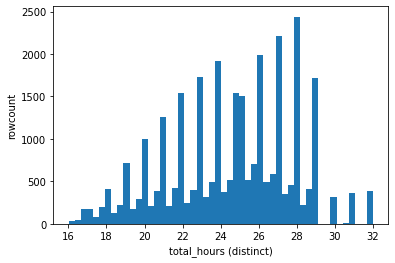

In [30]:
#This distribution show how many rows
X_train_window_size_15_grouped = X_train_window_size_15.groupby("total_hours").size().reset_index()
X_train_window_size_15_grouped.rename(columns={0: "rowcount"}, inplace=True)

plt.hist(X_train_window_size_15["total_hours"], label="rowcount", bins=50)
plt.xlabel("total_hours (distinct)")
plt.ylabel("rowcount")
plt.show()

##Candle Features 

Plots for open:


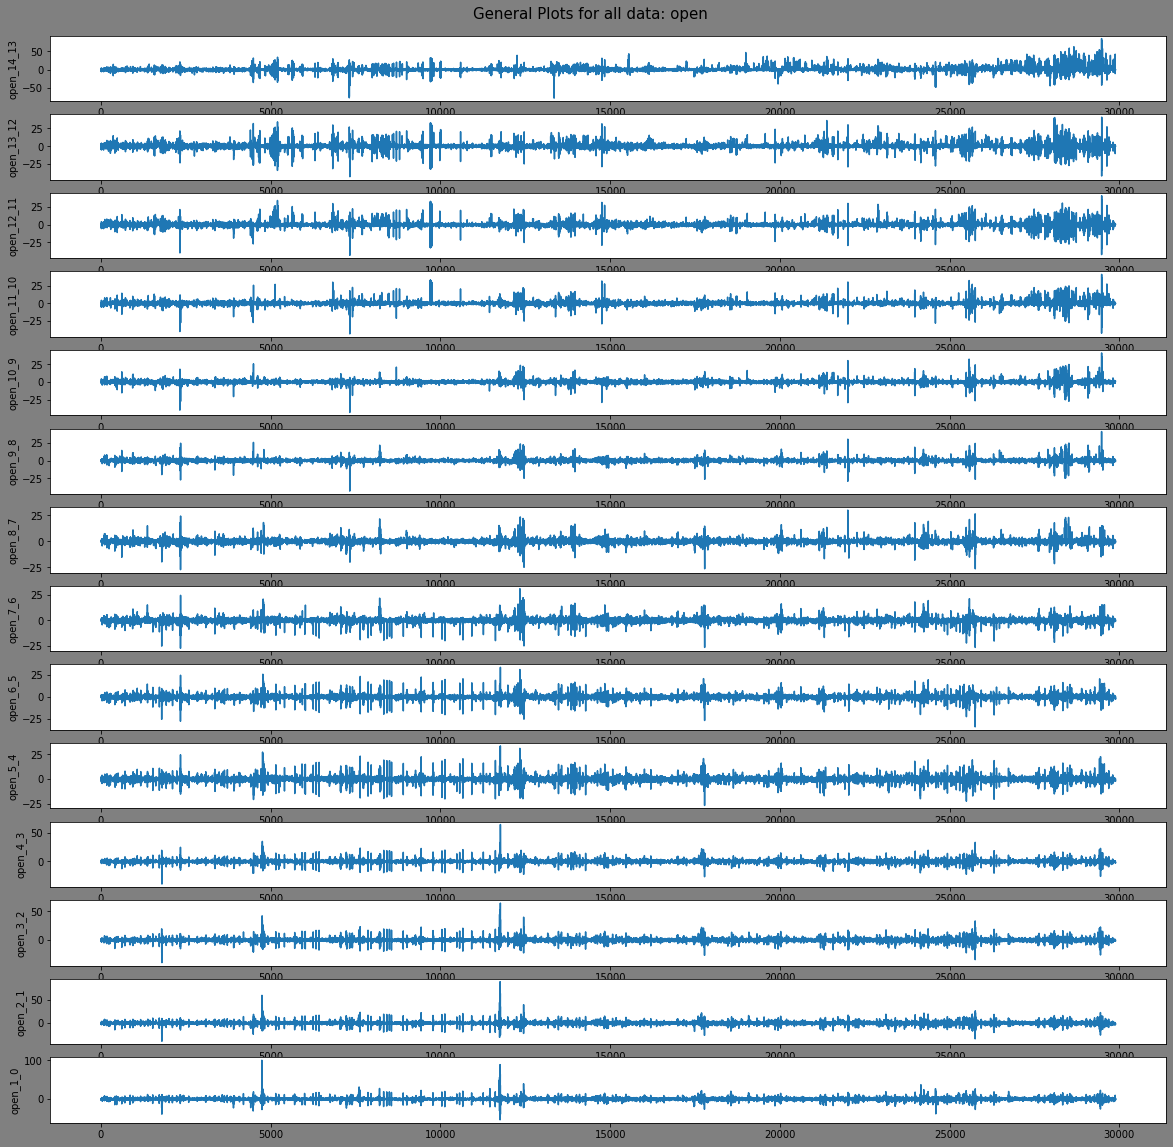

Plots for high:


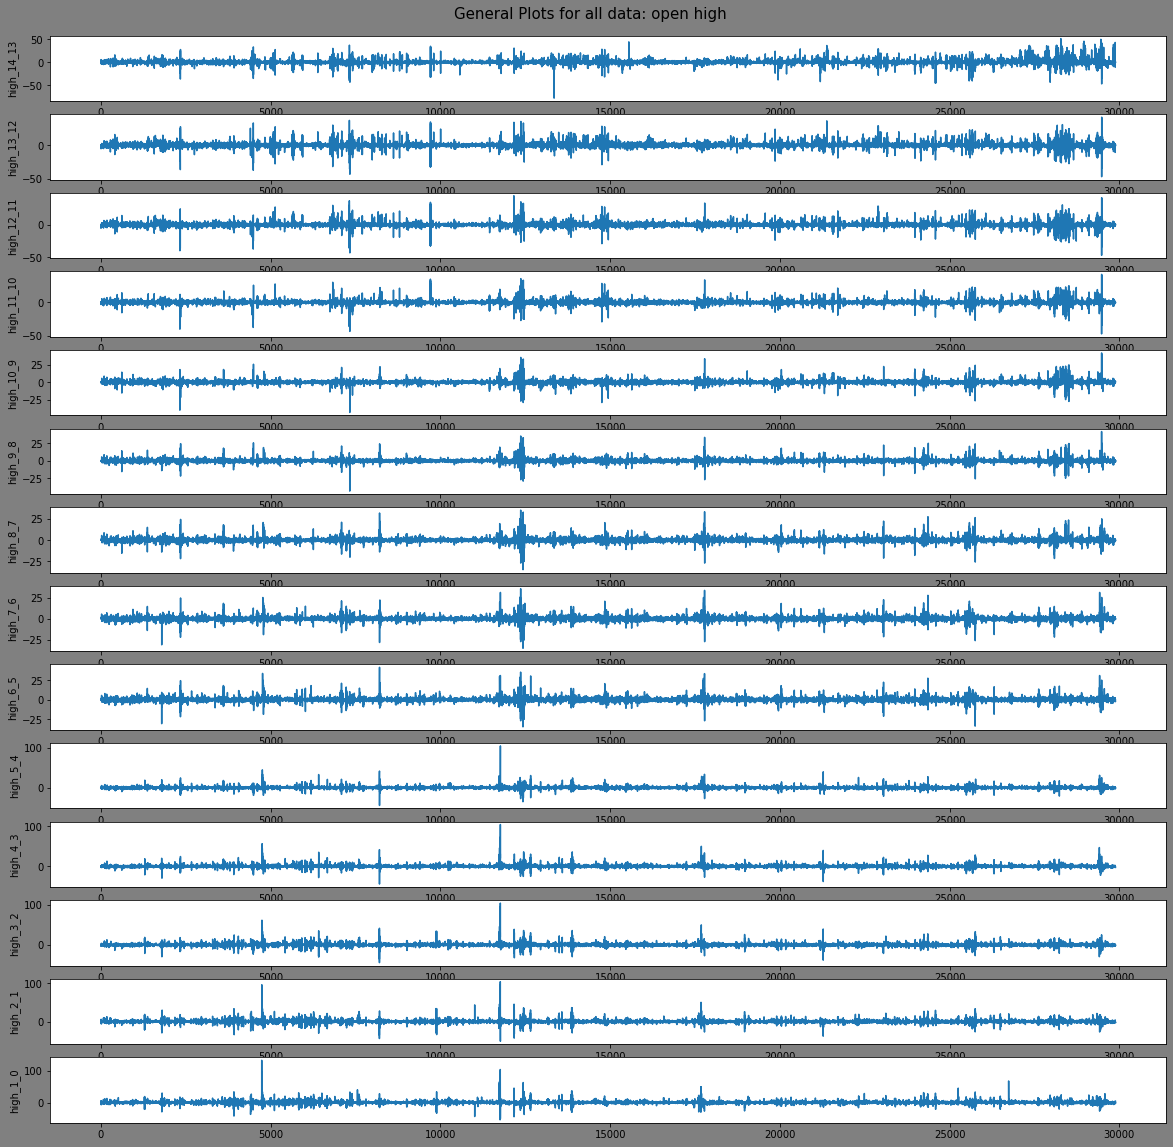

Plots for low:


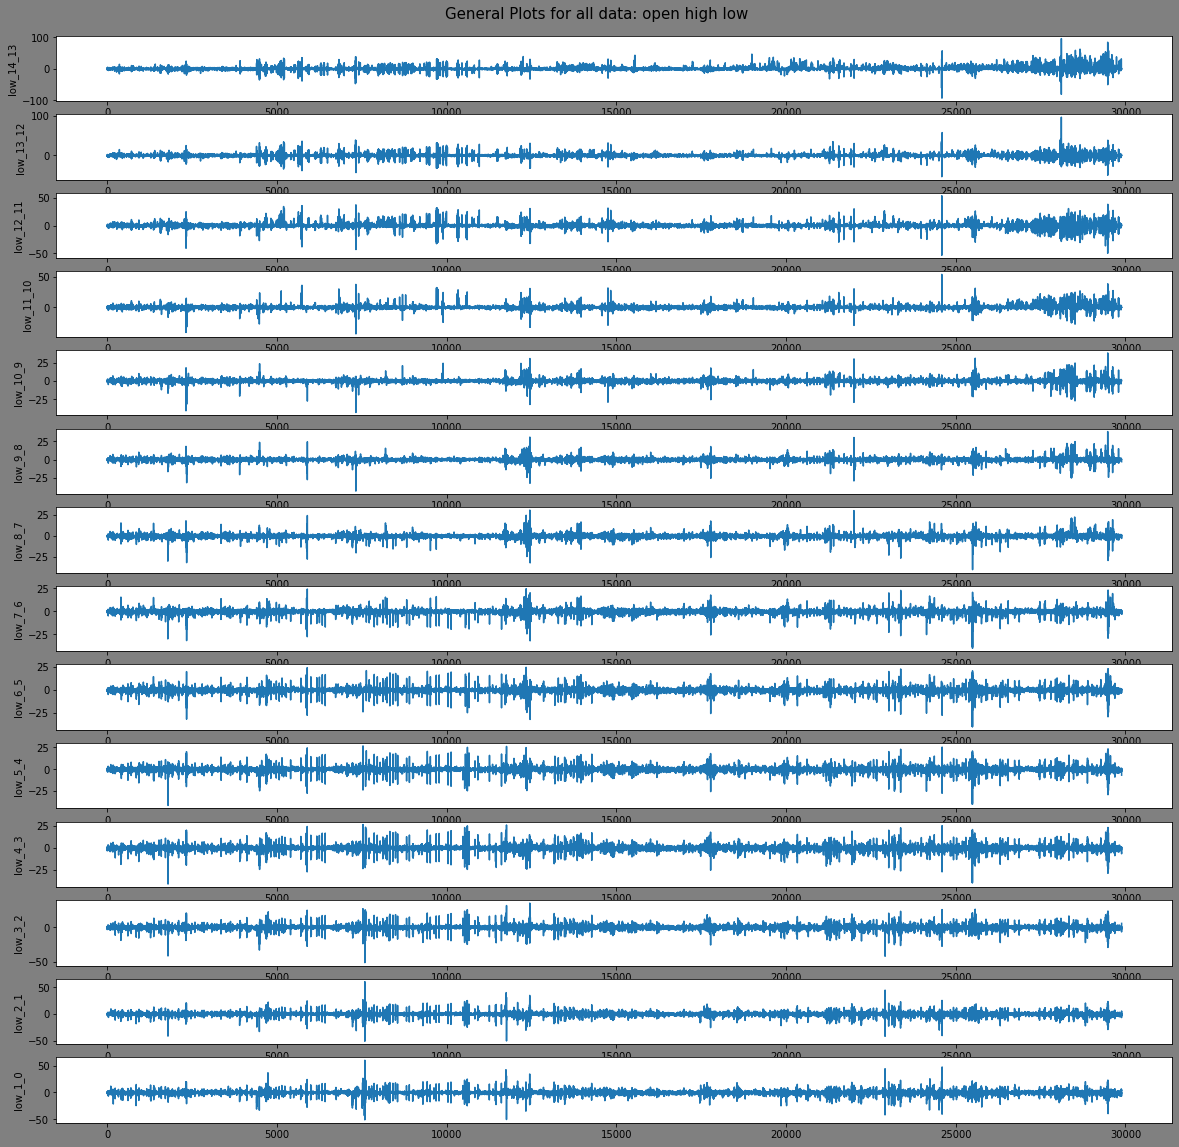

Plots for close:


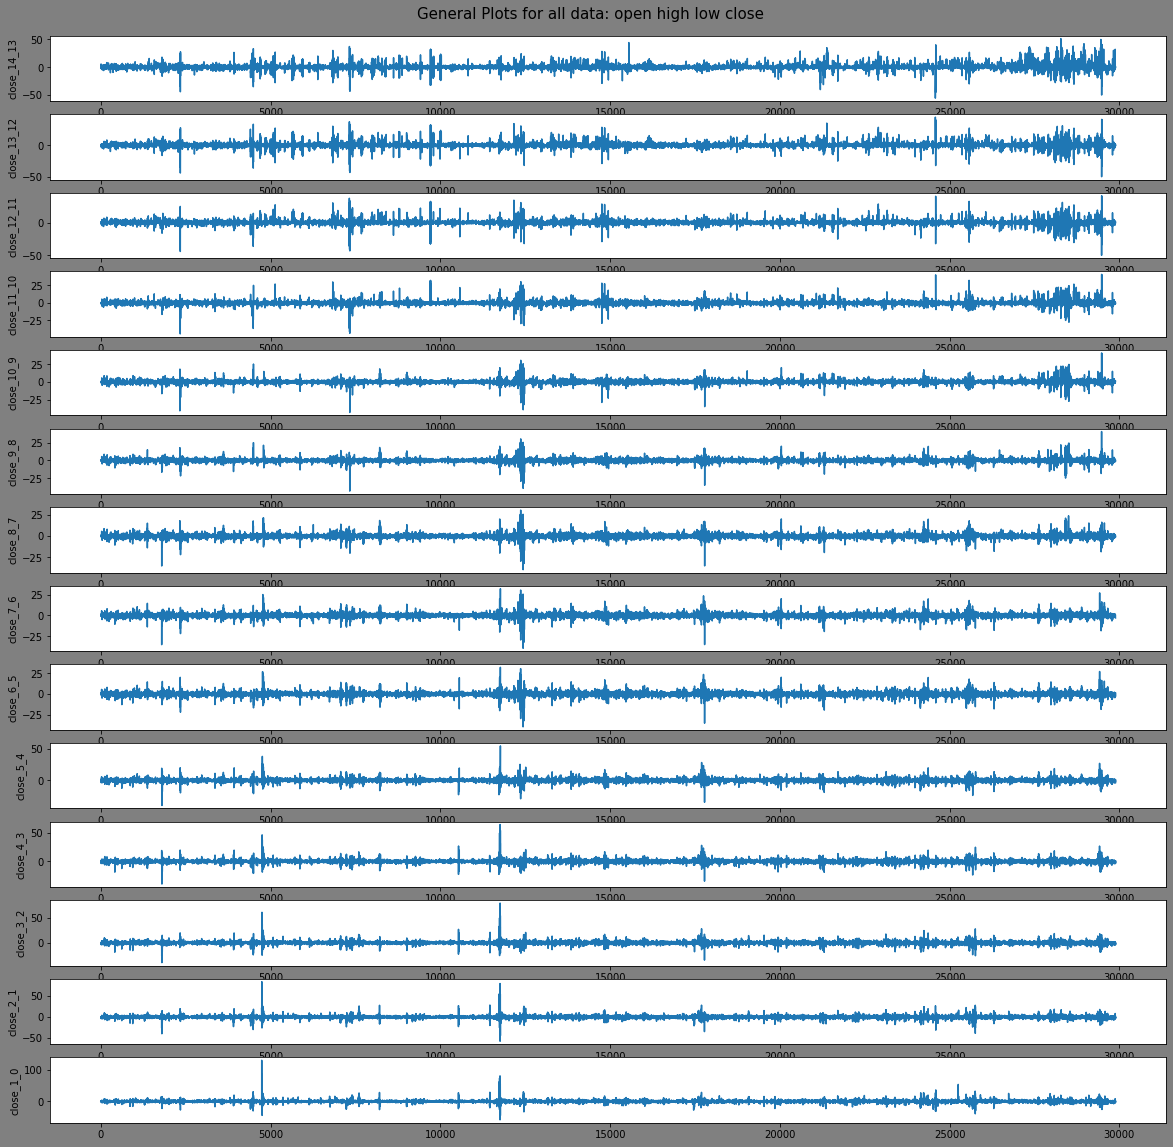

Plots for volume:


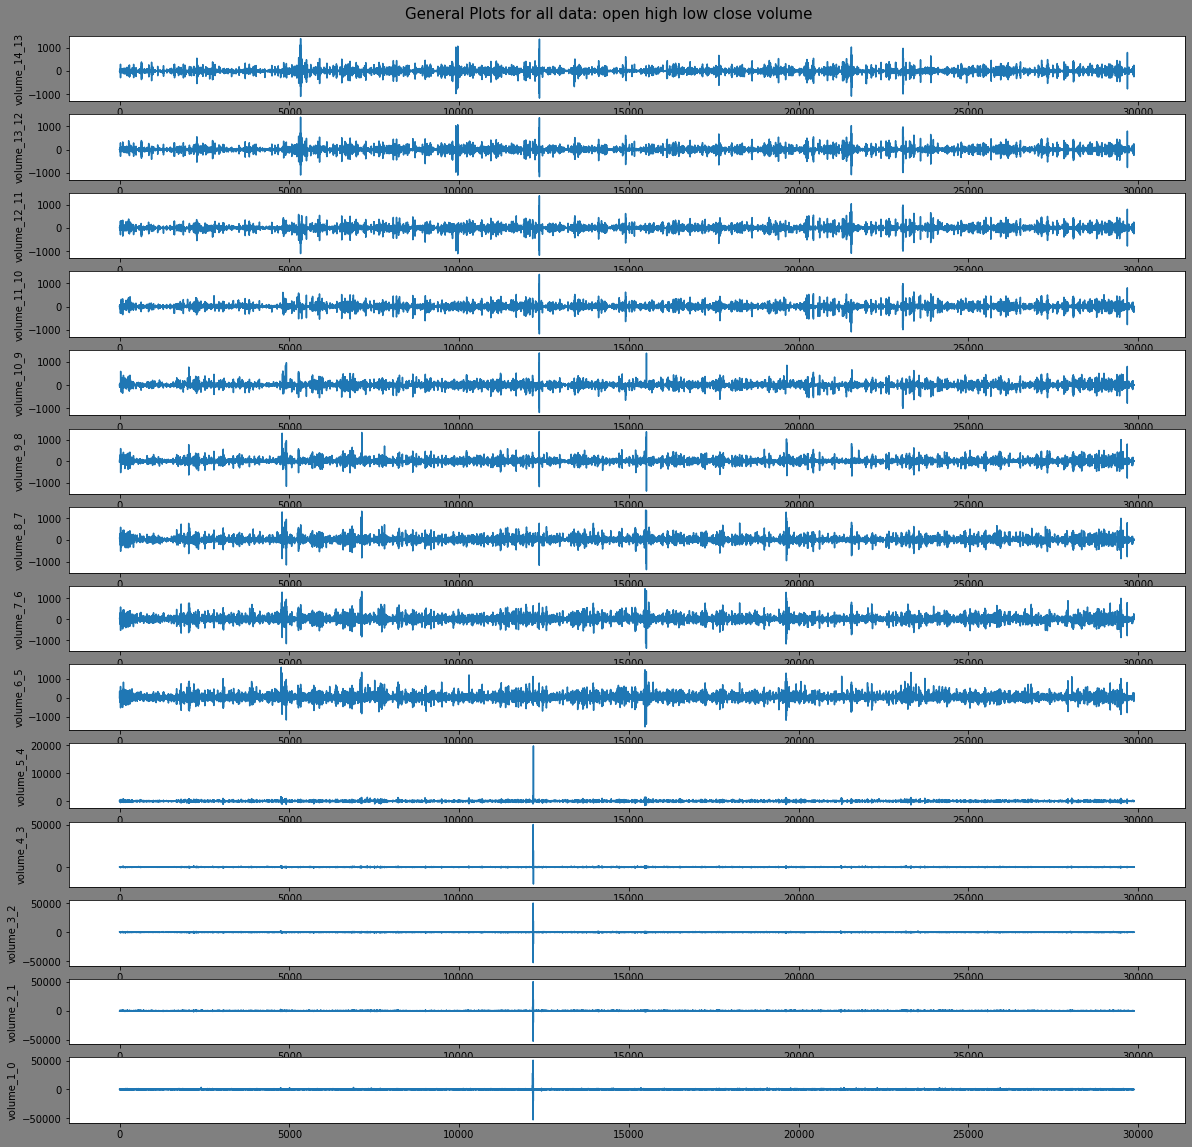

Plots for minutes:


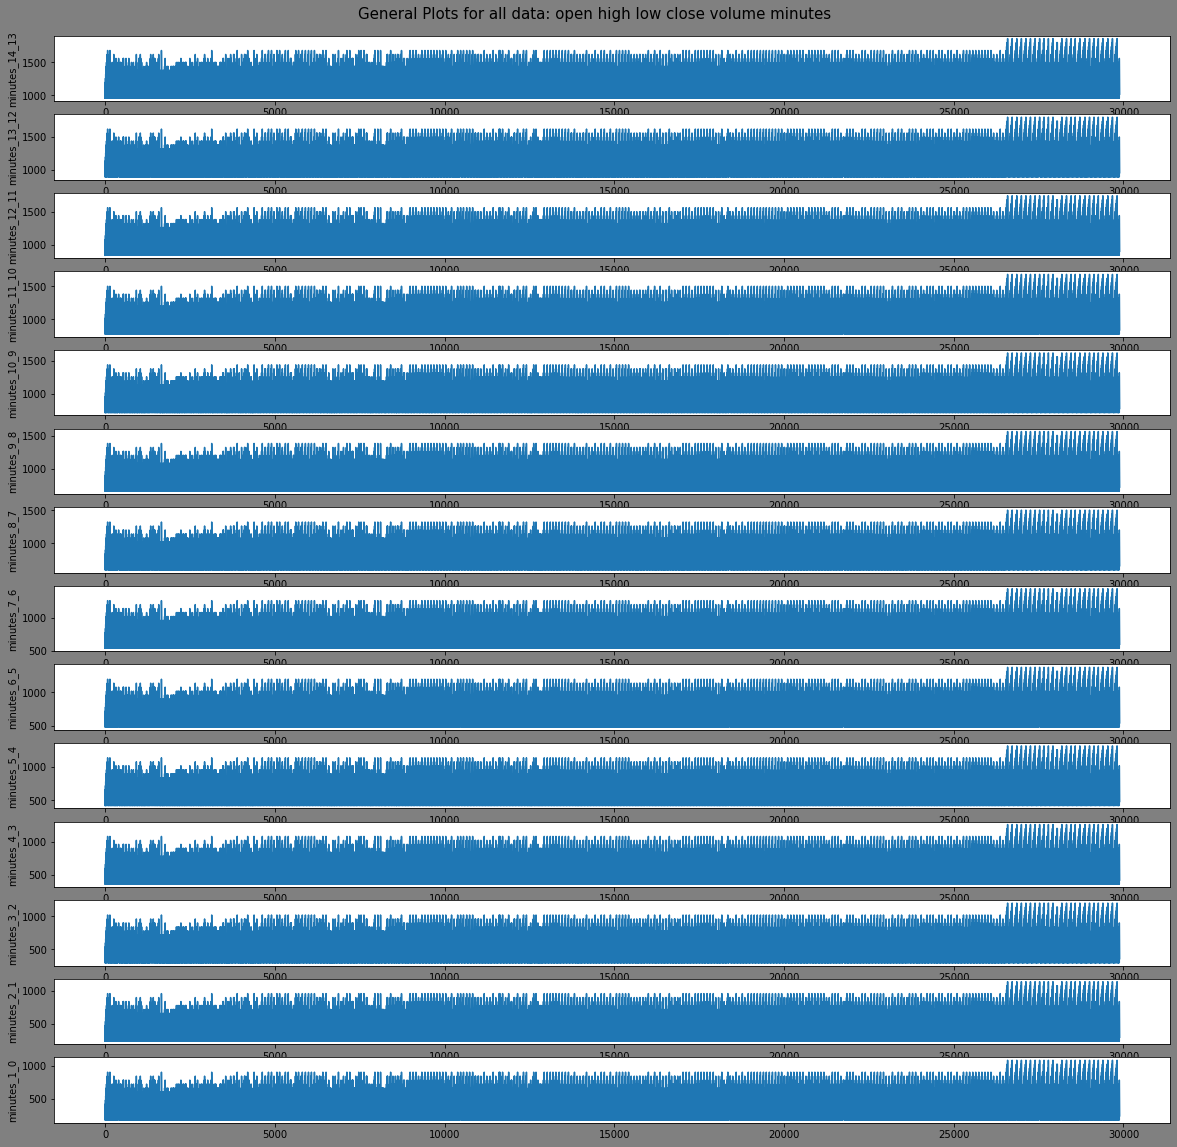

In [31]:
df_to_plot = X_train_window_size_15.copy()
title = "General Plots for all data:"
plot_subplots_wrapper(df_to_plot, title)

Plots for open:


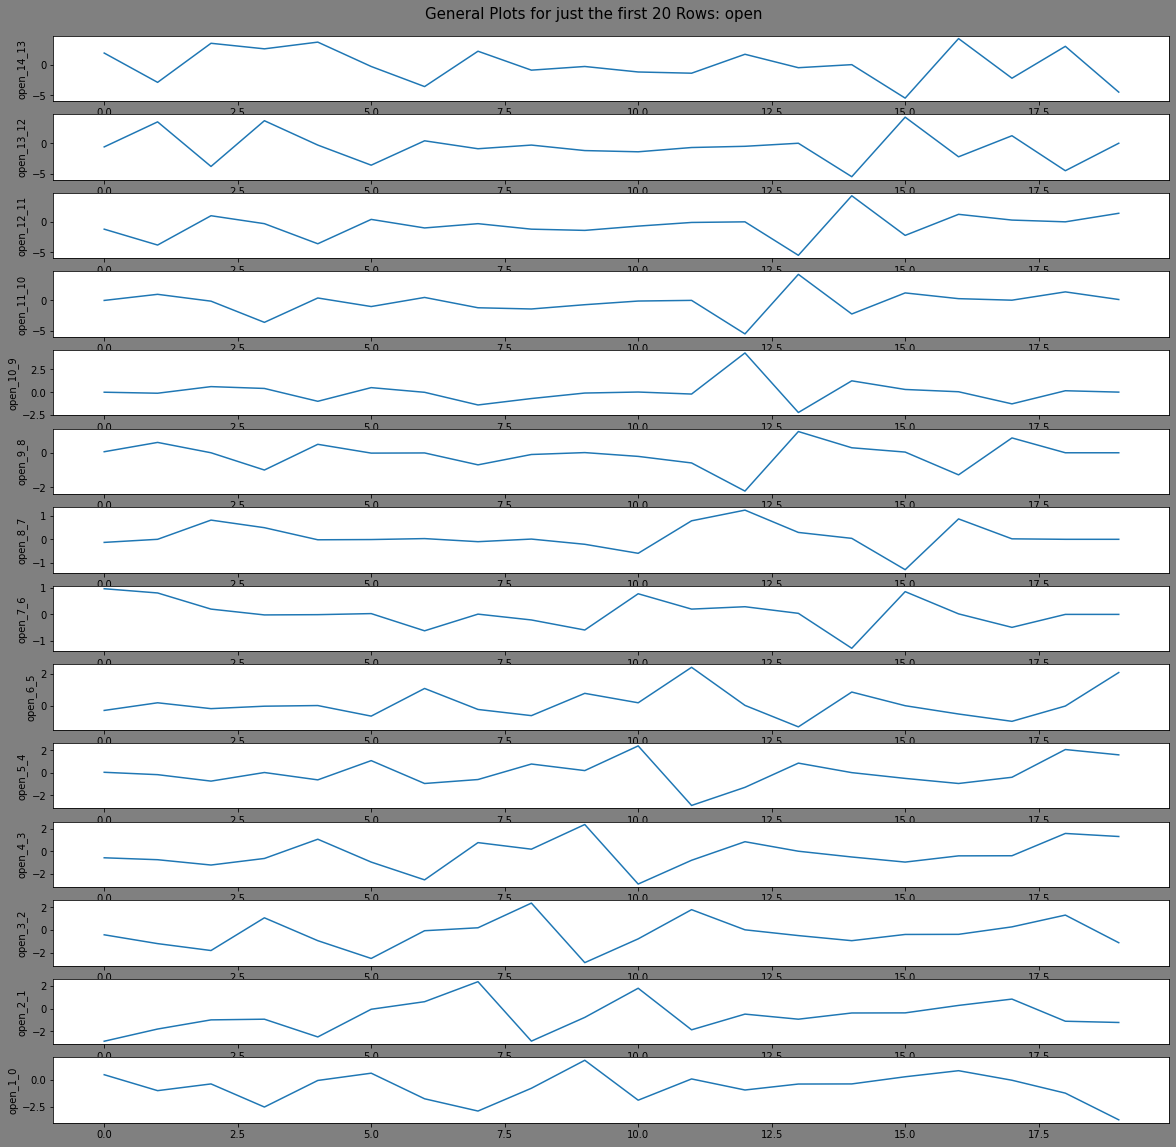

Plots for high:


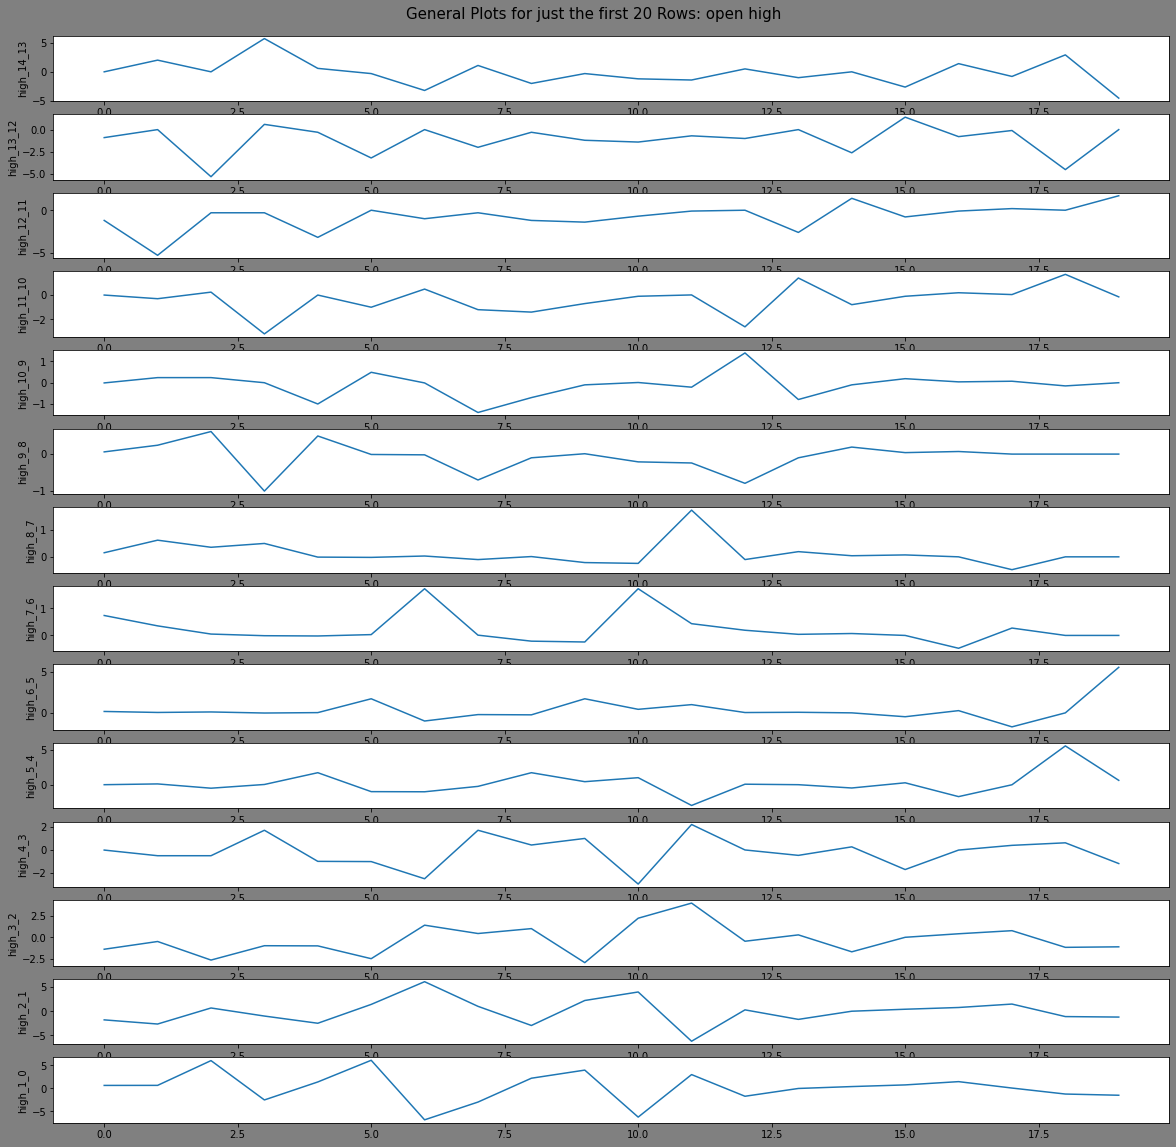

Plots for low:


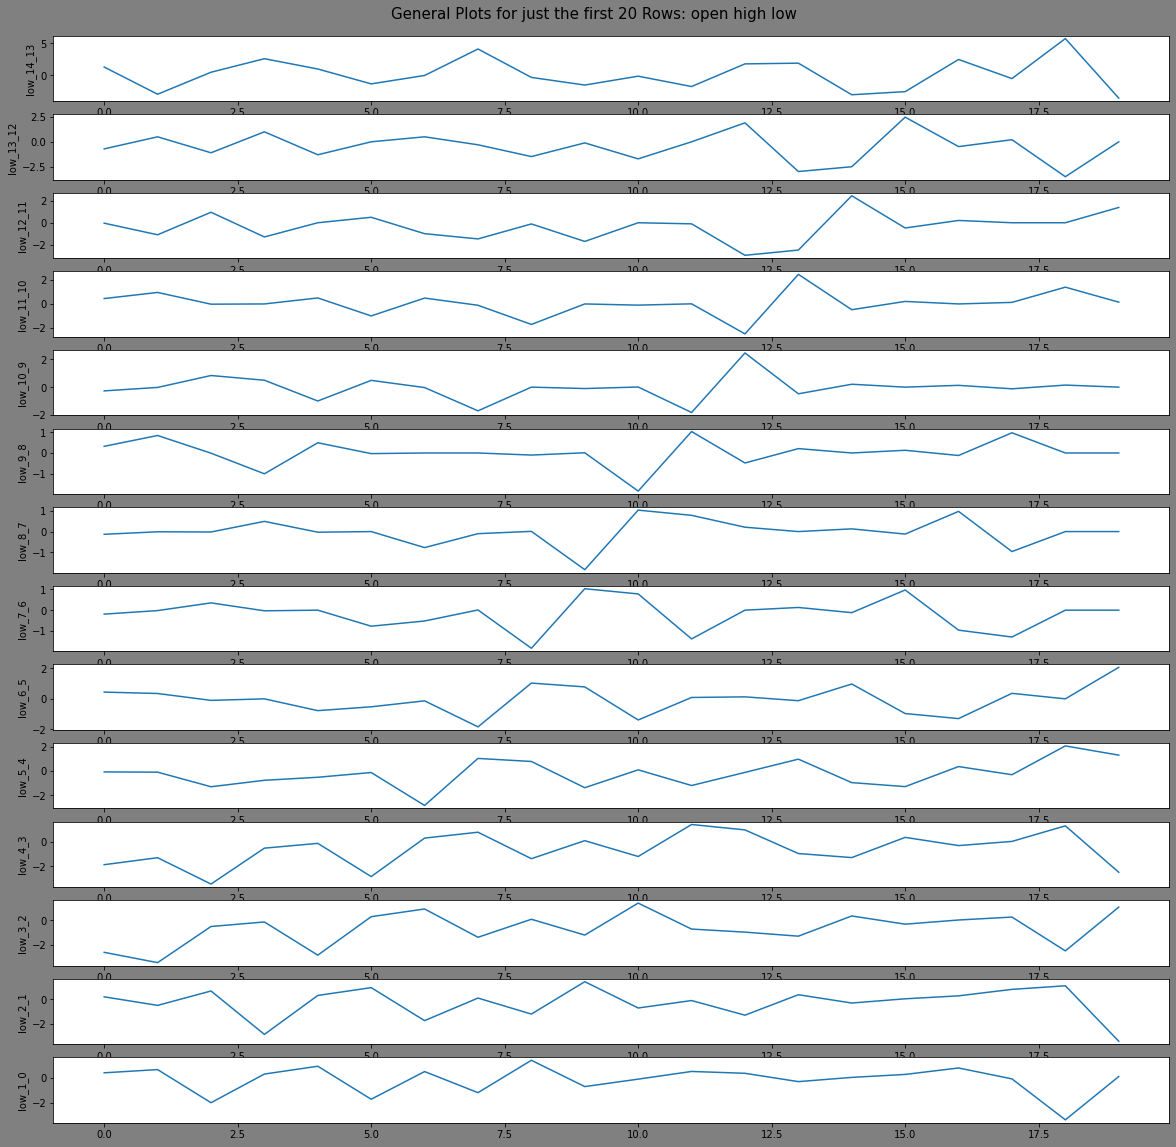

Plots for close:


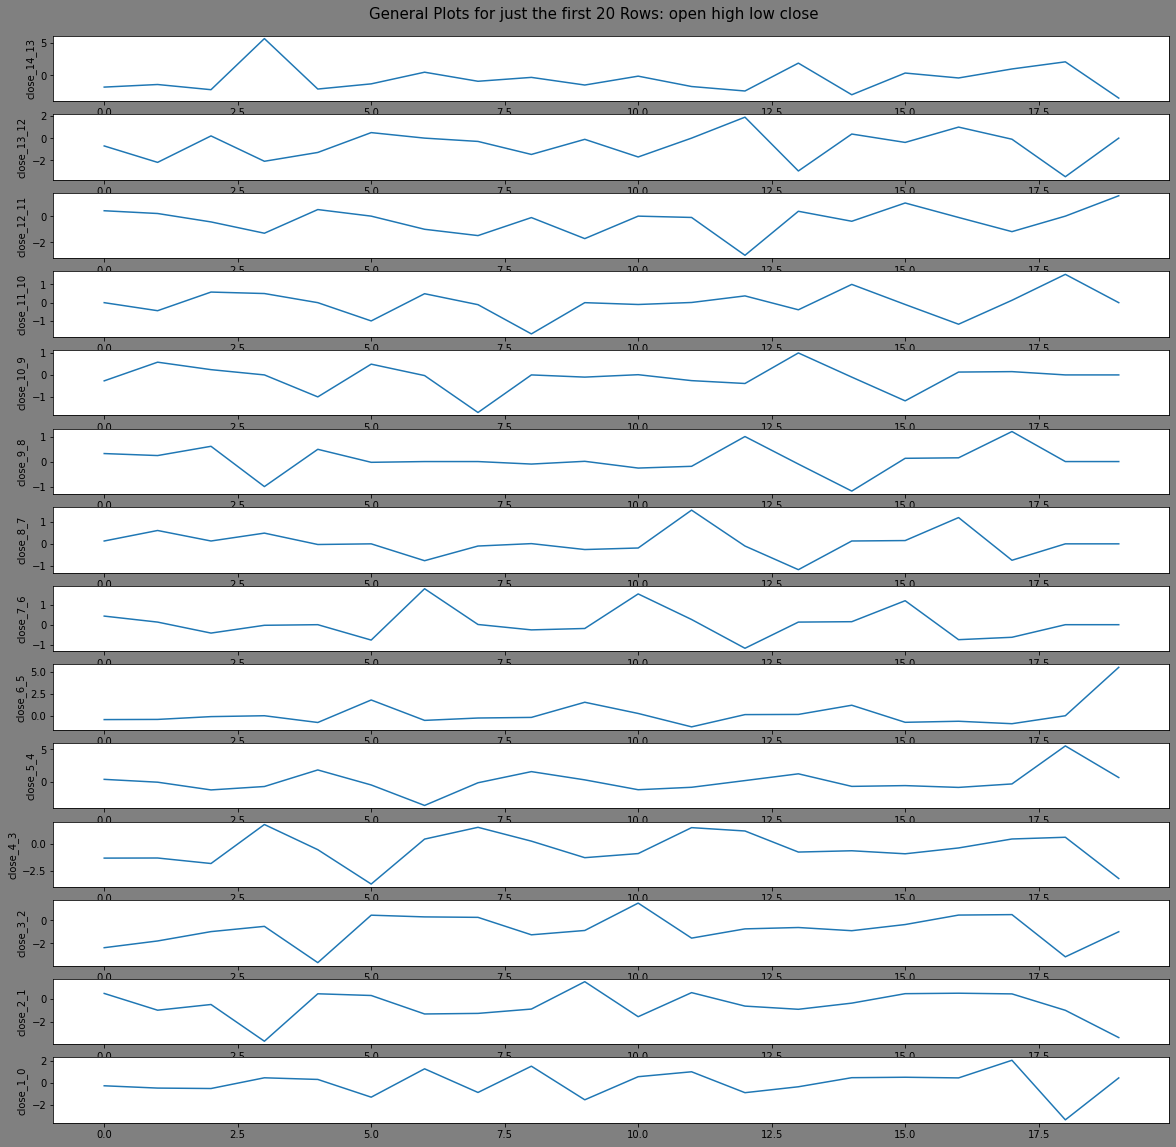

Plots for volume:


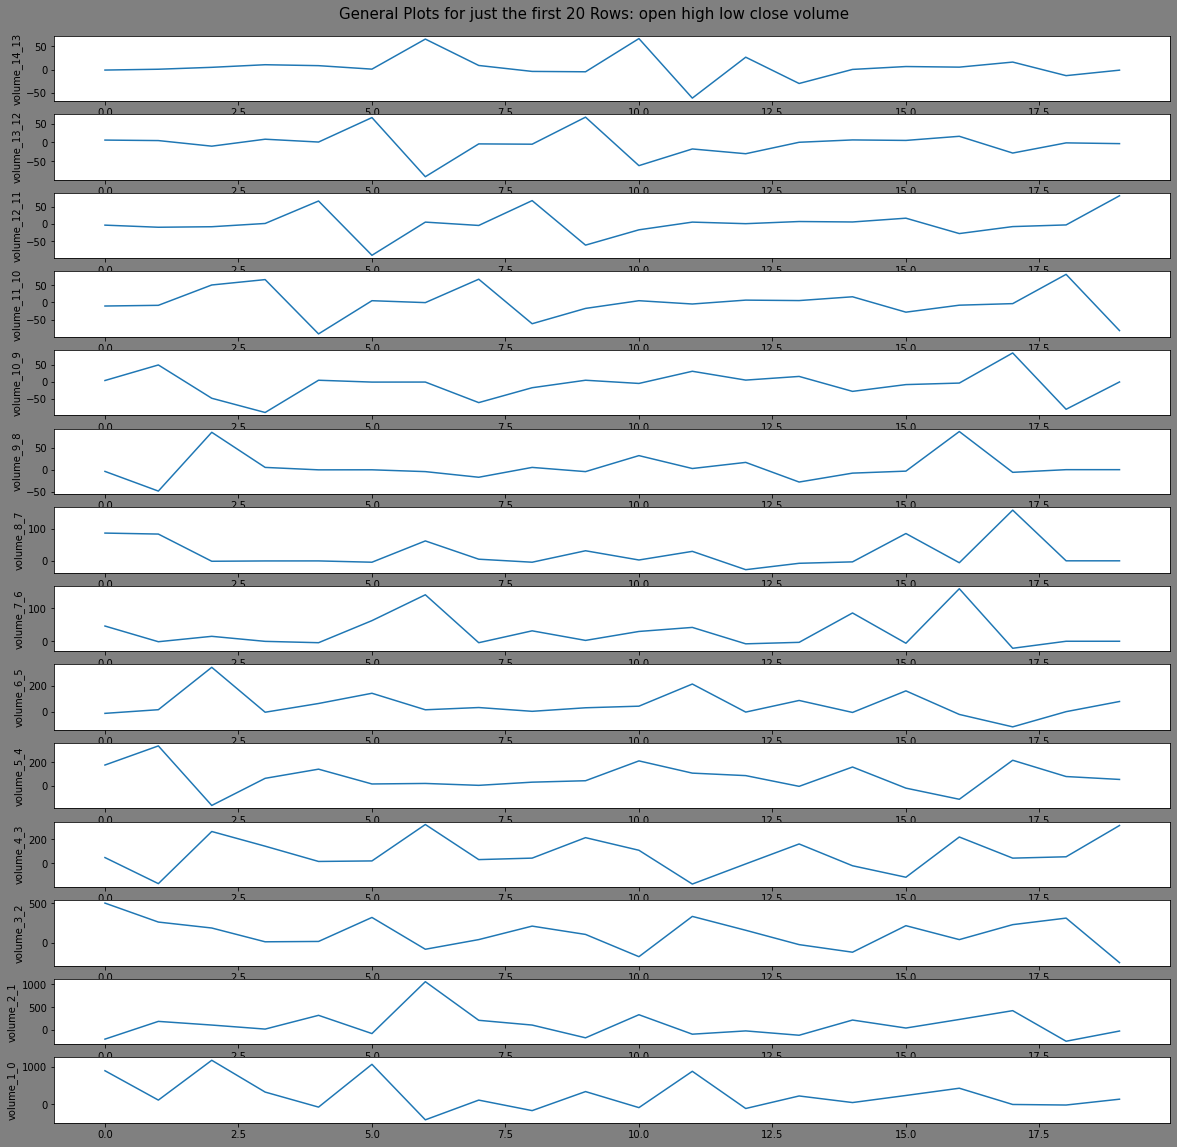

Plots for minutes:


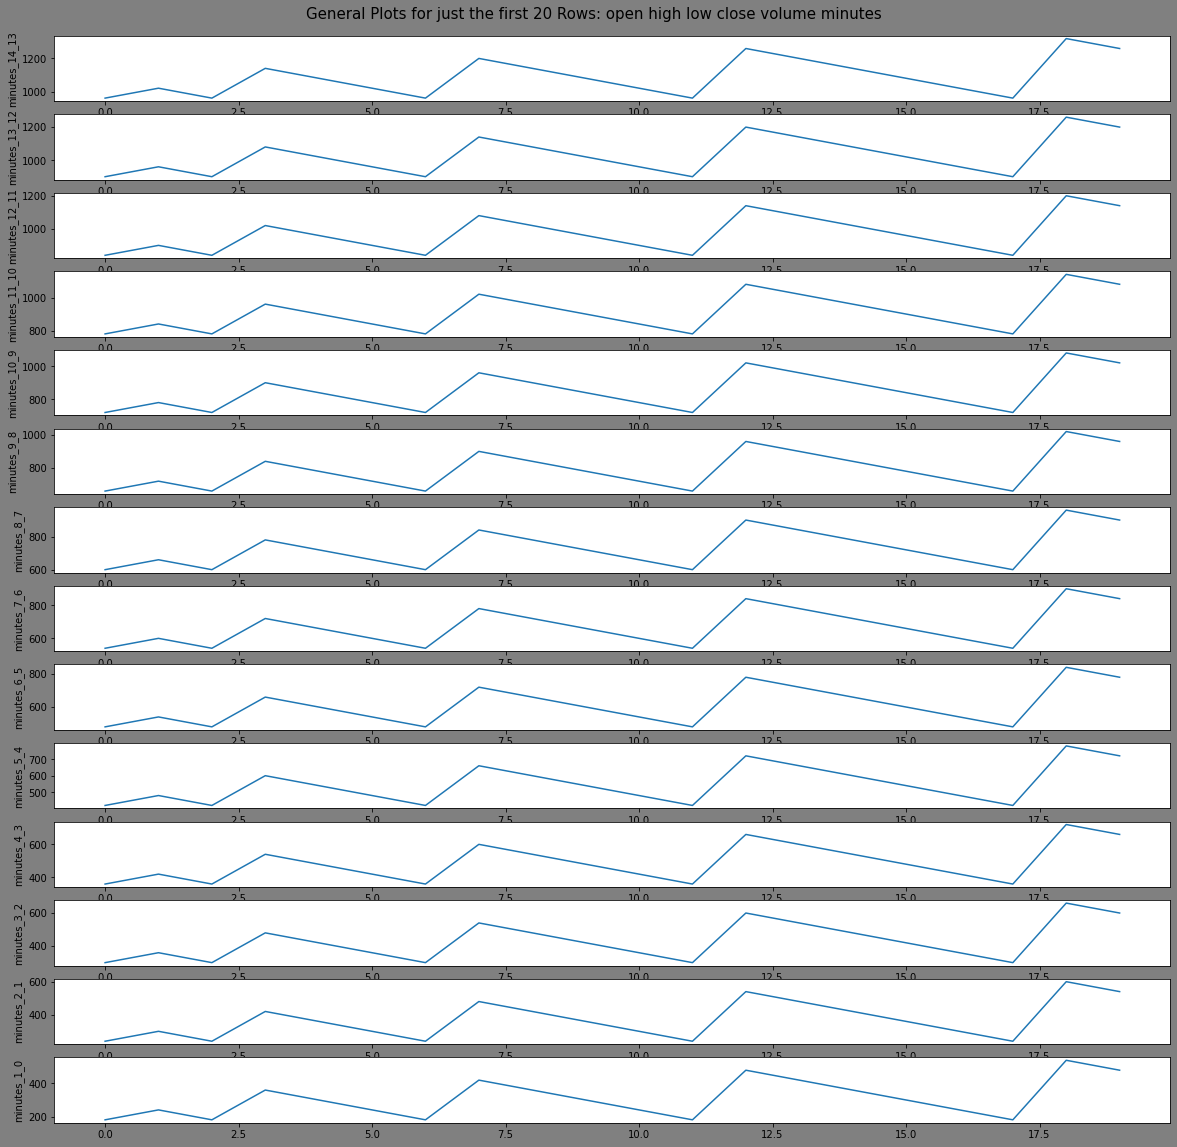

In [32]:
df_to_plot = X_train_window_size_15.copy()
title = "General Plots for just the first 20 Rows:"
plot_subplots_wrapper(df_to_plot.iloc[:20, :].reset_index(), title)

##Correlation

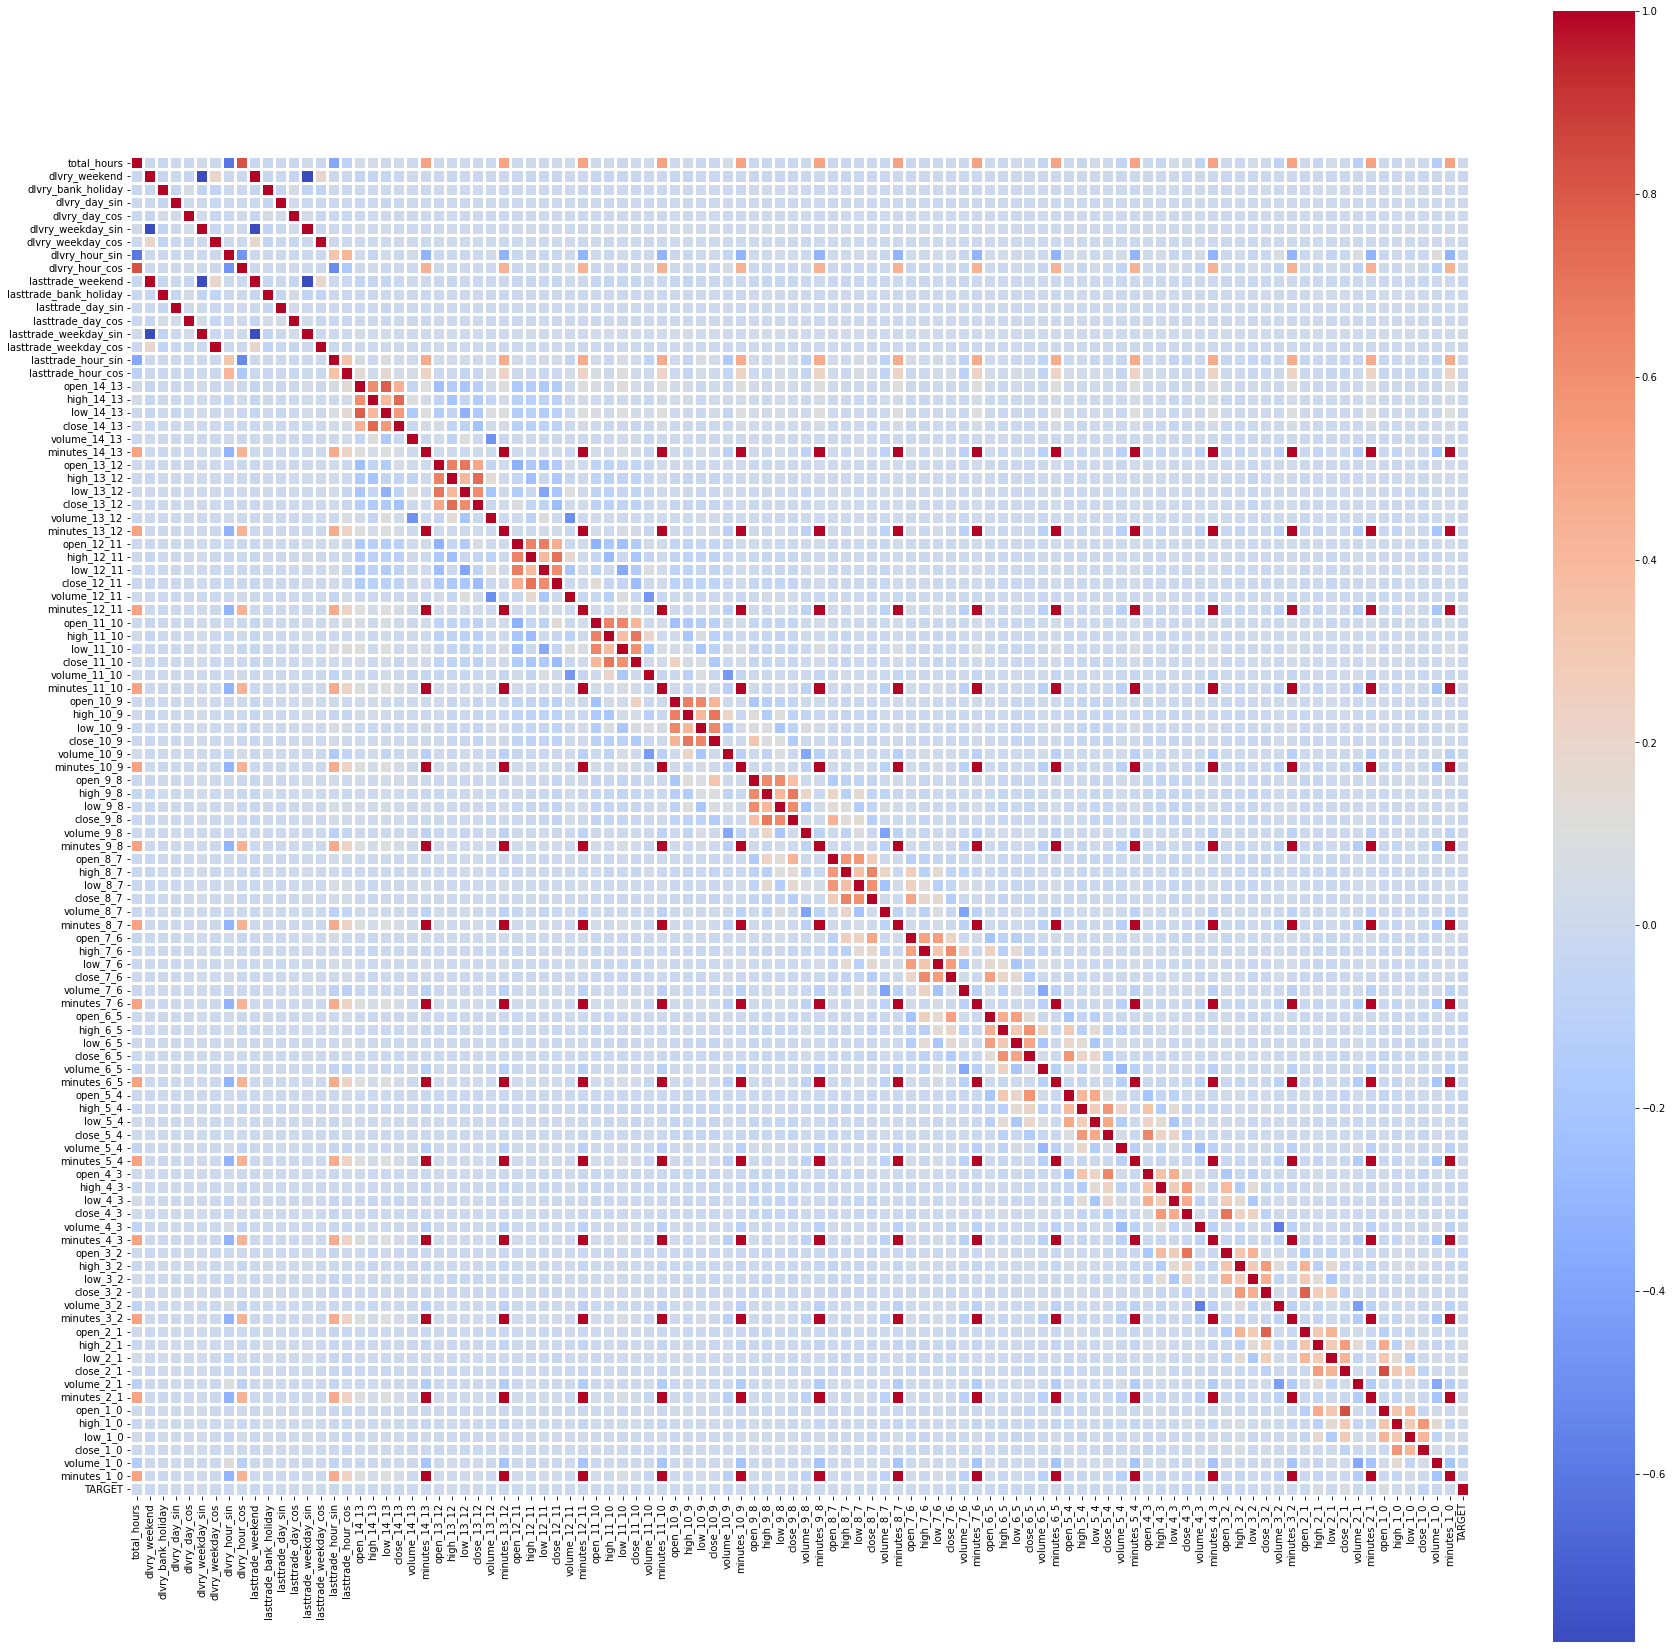

In [33]:
plt.figure(figsize=(30,30))
full_train_window_size_15 = X_train_window_size_15.copy()
full_train_window_size_15["TARGET"] = y_train_window_size_15["y"]
sns.heatmap(full_train_window_size_15.corr(), annot=False, linewidths = 2, square= True, cmap="coolwarm")
plt.show()

###The summary of the correlation matrix

#Creating Machine Learning models

##Evaluation: Mean absolut error function

In [45]:
def evaluate_model(model, X_test, y_test_true):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test_true, predictions)
    print("Root mean squared error on test:", mae)
    return mae

##Dummy regressor

In [46]:
dummy_model = DummyRegressor()

dummy_model.fit(X_train_window_size_15, y_train_window_size_15)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [47]:
result = evaluate_model(dummy_model, X_test_window_size_15, y_test_window_size_15)

Root mean squared error on test: 3.01123314148565


##Linear Regression

##ARIMA

##RandomForrest Regressor

##Gradient Boosting on Decision Trees (CatBoost and XGB)

##Support Vector Machine Regression

#Creating Deep Learning Models

##Preprocessing the data to 3D for Recurrent Neural Networks

##Mulit-Layer Perceptron

##Convolutional Neural Network

##Recurrent Neural Network

###LSTM: Long-Short-Term Memory

###Gated recurrent unit

##Transformers: Attention is all you need!